# Redes Neuronales Artificiales

Comenzamos importando una serie de librerías necesarias. Más adelante importaremos más liberías que vayamos necesitando en el proceso de construcción del modelo:

In [13]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

Importamos el dataset Banknote Authentication Dataset del UC Irvine Machine Learning Repository, un conjunto de datos que recopila información sobre imágenes de billetes bancarios tanto de curso legal como falsos:

In [22]:
df = pd.read_csv('data_banknote_authentication.csv')

df.head()

,variance_wti,skewness_wti,kurtosis_wti,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Veamos sus dimiensiones:

In [23]:
df.shape

(1372, 5)

Si contiene o no valores *missings*:

In [24]:
df.isnull().sum()

variance_wti    0
skewness_wti    0
kurtosis_wti    0
entropy         0
class           0
dtype: int64

El tipo de cada una de las columnas:

In [25]:
df.dtypes

variance_wti    float64
skewness_wti    float64
kurtosis_wti    float64
entropy         float64
class             int64
dtype: object

Y un pequeño resumen de los estadísticos más importantes de las columnas numéricas:

In [26]:
df.describe()

,variance_wti,skewness_wti,kurtosis_wti,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


Veamos también la distribución de ambas clases:

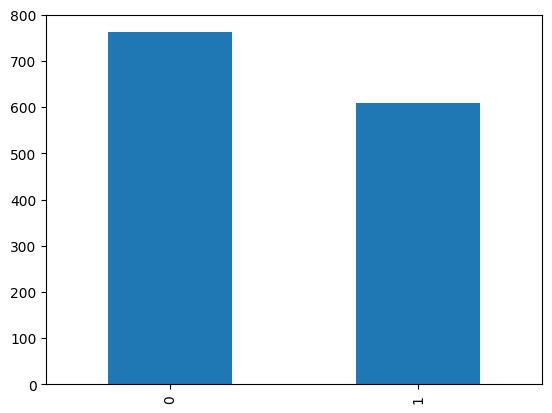

In [30]:
import matplotlib.pyplot as plt

df['class'].value_counts().plot(kind="bar")
plt.show()

In [32]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

Como podemos observar, la proporción entre observaciones positivas y negativas es cercana a 1. Esto indica que nos encontramos ante un dataset balanceado que plantea un problema de clasificación binaria.

Tras este estudio de los datos disponibles, comencemos con la construcción del modelo. En primer lugar, separamos las variables independientes, *X*,  de la columna target, *Y*:

In [33]:
X = df[df.columns[:-1]]
y = df['class']

Ahora, hacemos uso de la librería sklearn para hacer un split 70-30 en datos de entrenamiento y test respectivamente:

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

A continuación, puesto que las redes neuronales son modelos basados en distancias, llevamos a cabo un proceso de reescalado de los datos de entrada. Empleando el StandardScaler de la librería de sklearn reescalamos las variables de modo que la media sea $0$ y la desviación estándar $1$:

In [65]:
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

Una vez terminado el reescalado de los datos, empezamos con la construcción de la red:

In [74]:
from keras.optimizers import Adam

# Diseñamos la estructura de la red
model = Sequential()
model.add(Dense(64, input_shape=(4,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2))

# Definimos la funcion de perdida y el optimizador
adam = Adam()
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# Entrenamos el modelo, definimos los epoch y el porcentaje de observaciones que queremos dejar para la validacion
history = model.fit(X_train, y_train, epochs=20, batch_size=10, validation_split=0.2)

Epoch 1/20
77/77 [==============================] - 1s 3ms/step - loss: 0.3607 - accuracy: 0.5391 - val_loss: 0.0808 - val_accuracy: 0.6406
Epoch 2/20
77/77 [==============================] - 0s 2ms/step - loss: 0.0479 - accuracy: 0.5716 - val_loss: 0.0166 - val_accuracy: 0.6354
Epoch 3/20
77/77 [==============================] - 0s 2ms/step - loss: 0.0223 - accuracy: 0.5768 - val_loss: 0.0100 - val_accuracy: 0.6458
Epoch 4/20
77/77 [==============================] - 0s 2ms/step - loss: 0.0152 - accuracy: 0.6576 - val_loss: 0.0072 - val_accuracy: 0.6719
Epoch 5/20
77/77 [==============================] - 0s 2ms/step - loss: 0.0116 - accuracy: 0.6628 - val_loss: 0.0049 - val_accuracy: 0.6562
Epoch 6/20
77/77 [==============================] - 0s 2ms/step - loss: 0.0084 - accuracy: 0.6328 - val_loss: 0.0036 - val_accuracy: 0.6510
Epoch 7/20
77/77 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 0.7005 - val_loss: 0.0029 - val_accuracy: 0.7708
Epoch 8/20
77/77 [==

Veamos cómo ha sido el proceso de aprendizaje de los parámetros del modelo y cómo ha sido su efecto en las diferentes pérdidas y exactitudes:

In [75]:
import pandas as pd

model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

In [76]:
model_history.head()

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.360735,0.539062,0.080784,0.640625,0
1,0.047909,0.571615,0.016558,0.635417,1
2,0.022312,0.576823,0.009954,0.645833,2
3,0.015176,0.657552,0.007231,0.671875,3
4,0.011557,0.662760,0.004944,0.656250,4


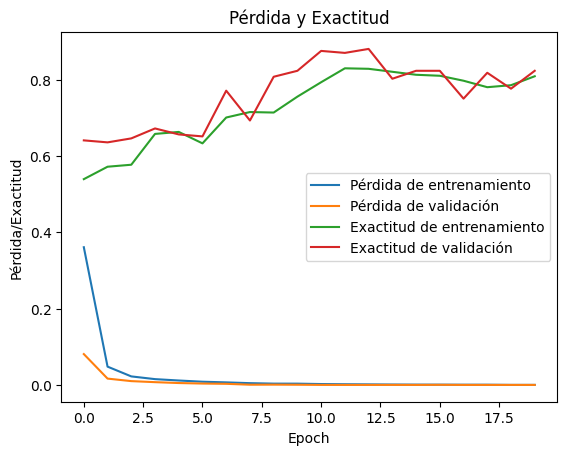

In [77]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
plt.plot(model_history['epoch'], model_history['loss'], label='Pérdida de entrenamiento')
plt.plot(model_history['epoch'], model_history['val_loss'], label='Pérdida de validación')
plt.plot(model_history['epoch'], model_history['accuracy'], label='Exactitud de entrenamiento')
plt.plot(model_history['epoch'], model_history['val_accuracy'], label='Exactitud de validación')
plt.title('Pérdida y Exactitud')
plt.xlabel('Epoch')
plt.ylabel('Pérdida/Exactitud')
plt.legend()
plt.show()

Con el objetivo de evitar el overfitting, para entrenar el modelo final que realizará la predicción de los patrones del conjunto de test, lo configuraremos con $epoch=5$:

In [79]:
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Diseñamos la estructura de la red
model_final = Sequential()
model_final.add(Dense(64, input_shape=(4,), activation='relu'))
# model_final.add(Dropout(0.2, seed=42))
model_final.add(Dense(32, activation='relu'))
model_final.add(Dense(2))

# Definimos la funcion de perdida y el optimizador
adam = Adam()
model_final.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# Entrenamos el modelo, definimos los epoch y el porcentaje de observaciones que queremos dejar para la validacion
history = model_final.fit(X_train, y_train, epochs=5, batch_size=10, validation_split=0.2)

# Realizamos la prediccon
loss, acc = model_final.evaluate(X_test, y_test, verbose=0)

print('Accuracy = {:.4f}'.format(acc))

Epoch 1/5
77/77 [==============================] - 1s 3ms/step - loss: 3.5977 - accuracy: 0.5208 - val_loss: 3.6705 - val_accuracy: 0.5938
Epoch 2/5
77/77 [==============================] - 0s 2ms/step - loss: 3.4116 - accuracy: 0.7188 - val_loss: 3.6273 - val_accuracy: 0.8385
Epoch 3/5
77/77 [==============================] - 0s 2ms/step - loss: 3.3977 - accuracy: 0.8633 - val_loss: 3.6208 - val_accuracy: 0.9219
Epoch 4/5
77/77 [==============================] - 0s 2ms/step - loss: 3.3934 - accuracy: 0.8971 - val_loss: 3.6207 - val_accuracy: 0.8802
Epoch 5/5
77/77 [==============================] - 0s 2ms/step - loss: 3.3909 - accuracy: 0.9010 - val_loss: 3.6201 - val_accuracy: 0.9062
Accuracy = 0.9053
